<a href="https://colab.research.google.com/github/ataulhaque/ML/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
y = tf.zeros(shape=(2, 1))
print(x)
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.613752  ]
 [-0.19446014]
 [ 1.5469152 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.29744565]
 [0.7048117 ]
 [0.8375598 ]], shape=(3, 1), dtype=float32)


In [ ]:
x[0, 0] =  0 #tensorflow object is non-assignable unlike numpy objects

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7619739],
       [-1.1046424],
       [-0.5294056]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3, 1))) #tensorflow variable can be assigned

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v[0, 0].assign(3.) #tensorflow variable can be assigned a subset value

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones((3, 1))) #tensorflow variable can be incremented
v
#

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [ ]:
v.assign_sub(tf.ones((3, 1))) #tensorflow variable can be decremented
v
#

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
a  = tf.random.normal((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[-0.9892387   1.3612397 ]
 [ 0.3200429   0.36304152]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.9785932  1.8529735 ]
 [0.10242746 0.13179915]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[       nan 1.1667218 ]
 [0.56572336 0.6025293 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[       nan 3.0196953 ]
 [0.66815084 0.73432845]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[        nan -4.993437  ]
 [ 0.23410484  0.4706161 ]], shape=(2, 2), dtype=float32)


In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)
#

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [ ]:
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [ ]:
import numpy as np
num_samples_per_batch = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_batch)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_batch)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_batch, 1), dtype="float32"), np.ones((num_samples_per_batch, 1), dtype="float32")))

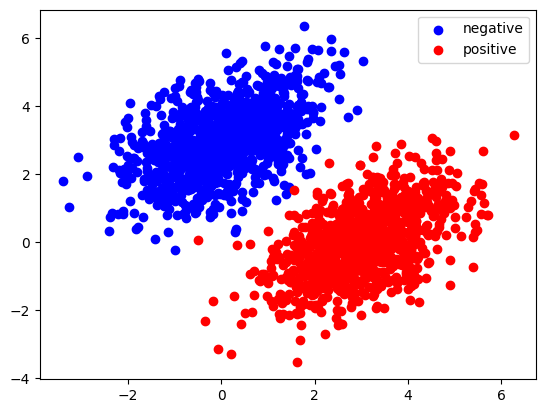

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(negative_samples[:, 0], negative_samples[:, 1], c="b", label="negative")
plt.scatter(positive_samples[:, 0], positive_samples[:, 1], c="r", label="positive")
plt.legend()
plt.show()

In [ ]:
#Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
#

In [ ]:
#the training step function
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    return loss

In [ ]:
#batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
#

Loss at step 0: 0.0275
Loss at step 1: 0.0272
Loss at step 2: 0.0270
Loss at step 3: 0.0267
Loss at step 4: 0.0265
Loss at step 5: 0.0263
Loss at step 6: 0.0262
Loss at step 7: 0.0260
Loss at step 8: 0.0259
Loss at step 9: 0.0257
Loss at step 10: 0.0256
Loss at step 11: 0.0255
Loss at step 12: 0.0254
Loss at step 13: 0.0253
Loss at step 14: 0.0252
Loss at step 15: 0.0251
Loss at step 16: 0.0251
Loss at step 17: 0.0250
Loss at step 18: 0.0249
Loss at step 19: 0.0249
Loss at step 20: 0.0248
Loss at step 21: 0.0248
Loss at step 22: 0.0248
Loss at step 23: 0.0247
Loss at step 24: 0.0247
Loss at step 25: 0.0247
Loss at step 26: 0.0246
Loss at step 27: 0.0246
Loss at step 28: 0.0246
Loss at step 29: 0.0246
Loss at step 30: 0.0245
Loss at step 31: 0.0245
Loss at step 32: 0.0245
Loss at step 33: 0.0245
Loss at step 34: 0.0245
Loss at step 35: 0.0245
Loss at step 36: 0.0244
Loss at step 37: 0.0244
Loss at step 38: 0.0244
Loss at step 39: 0.0244


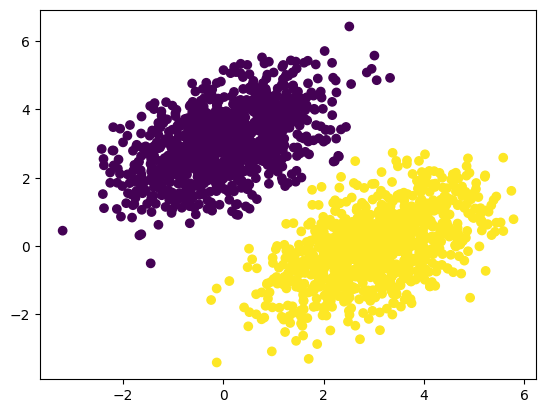

In [ ]:
#model prediction on training inputs
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()
#

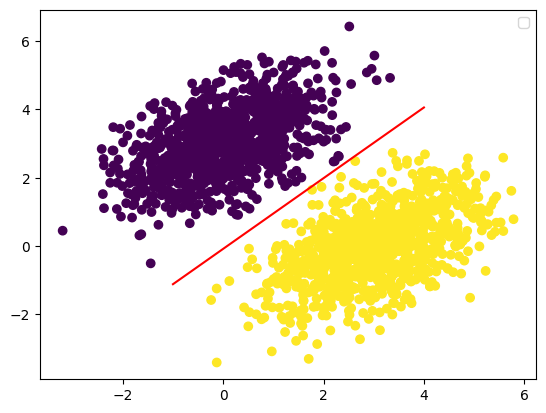

In [ ]:
#plot the line
#y = - w1 / w2 * x + (0.5 - b) / w2
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, c="r")
plt.legend()
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]> 0.5)
